In [1]:
#referenced pandas documentation or plotly documentation for developing code.
#https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt (reached out about state code- was sent a link)
#reached out to nsch data for questions
#helped me work through the bytestring!- https://www.freecodecamp.org/news/python-bytes-to-string-how-to-convert-a-bytestring/
#https://www.interviewkickstart.com/blog/learn/adding-new-column-to-existing-dataframe-in-pandas (using .insert method)
#helped me understand that nan is a float- https://towardsdatascience.com/5-methods-to-check-for-nan-values-in-in-python-3f21ddd17eed#:~:text=NaN%20stands%20for%20Not%20A,any%20other%20type%20than%20float
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#https://stackoverflow.com/questions/73466713/unmerge-cells-when-using-groupby-pandas (unmerging groupby cells)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
full_data_frame = pd.read_sas('nsch_2022e_topical.sas7bdat')
#full_data_frame

In [4]:
subset_for_state_maps = full_data_frame[['FIPSST', 'SC_AGE_YEARS']]
subset_for_state_maps = subset_for_state_maps.rename(columns = {'SC_AGE_YEARS': 'child_age'})

In [5]:
#subset_for_state_maps['FIPSST'].values

In [6]:
list_code = subset_for_state_maps['FIPSST'].tolist()

In [7]:
np.unique(list_code)

array([b'01', b'02', b'04', b'05', b'06', b'08', b'09', b'10', b'11',
       b'12', b'13', b'15', b'16', b'17', b'18', b'19', b'20', b'21',
       b'22', b'23', b'24', b'25', b'26', b'27', b'28', b'29', b'30',
       b'31', b'32', b'33', b'34', b'35', b'36', b'37', b'38', b'39',
       b'40', b'41', b'42', b'44', b'45', b'46', b'47', b'48', b'49',
       b'50', b'51', b'53', b'54', b'55', b'56'], dtype='|S2')

In [8]:
states_as_numbers = []
for item in list_code:
    item = item.decode("utf-8")
    states_as_numbers.append(item)

In [9]:
subset_for_state_maps.insert(1, "states_as_numbers", states_as_numbers)

In [10]:
#subset_for_state_maps

In [11]:
child_flourishing_df = full_data_frame[['SC_AGE_YEARS', 'K6Q70_R', 'K6Q73_R', 'K6Q71_R', 'K6Q72_R']]
child_flourishing_df = child_flourishing_df.loc[full_data_frame['SC_AGE_YEARS'] < 6.0]
child_flourishing_df = child_flourishing_df.rename(columns = {'SC_AGE_YEARS': 'child_age', 'K6Q70_R': 'affectionate_child', 'K6Q73_R': 'child_bounces_back', 
                                                              'K6Q71_R': 'curious_child', 'K6Q72_R': 'child_smile_laugh'})
#child_flourishing_df

In [12]:
adolescent_flourishing_df = full_data_frame[['SC_AGE_YEARS','K6Q71_R', 'K7Q84_R', 'K7Q85_R']]
adolescent_flourishing_df = adolescent_flourishing_df.loc[full_data_frame['SC_AGE_YEARS'] >= 6.0]
adolescent_flourishing_df = adolescent_flourishing_df.rename(columns = {'SC_AGE_YEARS': 'adolescent_age', 'K6Q71_R': 'curiosity_learning', 
                                                                        'K7Q84_R': 'task_completion', 'K7Q85_R': 'emotional_regulation'})
#adolescent_flourishing_df

In [13]:
subset_for_state_maps = subset_for_state_maps.drop(columns = ['FIPSST'])
#subset_for_state_maps

In [14]:
subset_for_state_maps = subset_for_state_maps.replace({'01' : 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 
                                                       'CO', '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', 
                                                       '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', 
                                                       '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA',
                                                       '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT', 
                                                       '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', 
                                                       '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH','40': 'OK', '41': 'OR', 
                                                       '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', 
                                                       '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', 
                                                       '54': 'WV', '55': 'WI','56': 'WY'
                            })
subset_for_state_maps = subset_for_state_maps.rename(columns = {'states_as_numbers': 'states'})
#subset_for_state_maps

In [38]:
def meets_flourishing_criteria(subset_for_state_maps, df, column_name):
    if df is child_flourishing_df:
        subset_for_state_maps = subset_for_state_maps.loc[subset_for_state_maps['child_age'] < 6.0]
    else:
        subset_for_state_maps = subset_for_state_maps.loc[subset_for_state_maps['child_age'] >= 6.0]   
    column_to_review = df[column_name].tolist()
    flourishing_yes_no = []
    for item in column_to_review:
        if item == 1.0:
            flourishing_yes_no.append(1.0)
            #flourishing_yes_no.append('flourishing')
        elif item == 2.0:
            flourishing_yes_no.append(1.0)
            #flourishing_yes_no.append('flourishing')
        elif item == 3.0:
            flourishing_yes_no.append(0.0)
            #flourishing_yes_no.append('not_flourishing')
        elif item == 3.0:
            flourishing_yes_no.append(0.0)
            #flourishing_yes_no.append('not_flourishing') 
        else:
            flourishing_yes_no.append(float('NaN'))
    subset_for_state_maps.insert(2, column_name, flourishing_yes_no)
    subset_for_state_maps = subset_for_state_maps.dropna()
    subset_for_state_maps = subset_for_state_maps.groupby(['states'], as_index = False).mean()
    fig = px.choropleth(locations = subset_for_state_maps['states'], locationmode="USA-states", color = subset_for_state_maps[column_name], color_continuous_scale = 'greens', scope="usa", title = 'How often are children affectionate?')
    fig.update_layout(title_x=0.5, margin=dict(l=20, r=20, t=40, b=20))
    return fig
#note- where 1 indicates flourishing, and 0 indicates not flourishing!

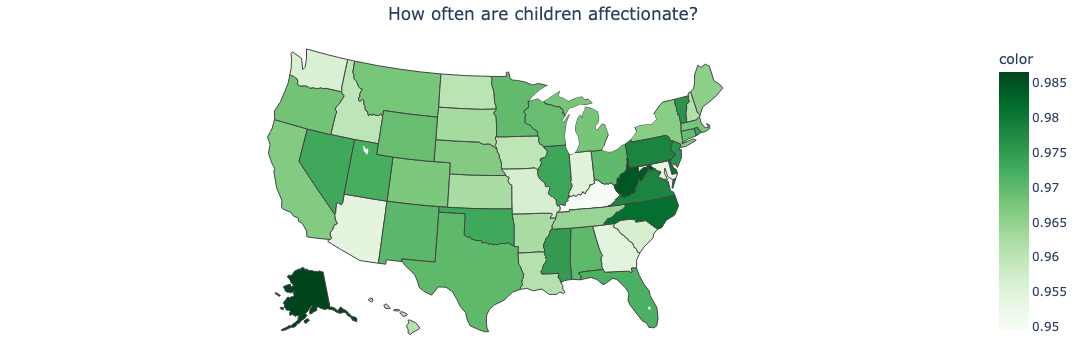

In [39]:
current_set = meets_flourishing_criteria(subset_for_state_maps, child_flourishing_df, 'affectionate_child')
current_set

In [17]:
#subset_2

In [18]:
family_health_df = full_data_frame[['SC_AGE_YEARS', 'A1_PHYSHEALTH', 'A1_RELATION', 'A1_SEX', 'A1_MENTHEALTH', 'A2_PHYSHEALTH', 'A2_RELATION', 'A2_SEX', 'A2_MENTHEALTH',
                                       'K9Q40', 'K9Q41', 'VAPE', 'A1_EMPLOYED', 'A2_EMPLOYED', 'K8Q21', 'K6Q60_R', 'K6Q61_R', 'K8Q11', 'SCREENTIME', 'TALKABOUT', 'WKTOSOLVE', 
                                       'STRENGTHS', 'HOPEFUL', 'ACE1', 'ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'ACE12', 'ACE11', 'K8Q31', 'K8Q32', 
                                       'K8Q34', 'K8Q35','K8Q30', 'K6Q27','CUTHOURS', 'STOPWORK', 'AVOIDCHG', 'ATHOMEHC', 'ARRANGEHC', 'K6Q20', 'SLEEPPOS', 'BEDTIME', 'HOURSLEEP',
                                       'HOURSLEEP05', 'FOODSIT', 'K11Q60', 'K11Q61', 'K11Q62', 'S9Q34', 'EBTCARDS', 'SSI', 'SSIDISABILITY', 'MISSMORTGAGE', 'HOMEEVIC', 
                                       'PLACESLIVED', 'EVERHOMELESS', 'K6Q70_R', 'K6Q73_R', 'K6Q71_R', 'K6Q72_R']]

#subset of variables from the Child and Family Health Measures – Family Health and Activities (in the codebook).
#note- ask Smith afterwards if standardization of these variables in order to conduct PCA Analysis

In [19]:
family_health_df.describe()

,SC_AGE_YEARS,A1_PHYSHEALTH,A1_RELATION,A1_SEX,A1_MENTHEALTH,A2_PHYSHEALTH,A2_RELATION,A2_SEX,A2_MENTHEALTH,K9Q40,...,SSI,SSIDISABILITY,MISSMORTGAGE,HOMEEVIC,PLACESLIVED,EVERHOMELESS,K6Q70_R,K6Q73_R,K6Q71_R,K6Q72_R
count,54103.000000,52151.000000,52637.000000,52437.000000,52193.000000,44100.000000,52117.000000,44134.000000,44169.000000,52798.000000,...,52817.000000,1171.000000,52686.000000,52715.000000,52377.000000,52618.000000,19456.000000,19465.000000,53406.000000,19480.000000
mean,8.604902,2.153957,1.200429,1.685756,2.116931,2.056848,2.226490,1.370327,2.023569,1.886662,...,1.977488,1.615713,1.904851,4.756805,1.021956,1.985860,1.366828,1.826817,1.579579,1.215606
std,5.307826,0.876002,0.762955,0.464218,0.917602,0.872186,2.536292,0.482898,0.893161,0.317008,...,0.148342,0.486634,0.333679,0.693689,0.146542,0.149467,0.566836,0.711352,0.731125,0.444603
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,14.000000,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,17.000000,5.000000,7.000000,2.000000,5.000000,5.000000,8.000000,2.000000,5.000000,2.000000,...,2.000000,2.000000,3.000000,5.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000


In [20]:
child_family_health_df = family_health_df.loc[family_health_df['SC_AGE_YEARS'] < 6.0]

In [21]:
matrix = child_family_health_df.corr()
matrix = matrix[0:62]

In [22]:
first_column = matrix['K6Q70_R'].tolist()
second_column = matrix['K6Q73_R'].tolist()
third_column = matrix['K6Q71_R'].tolist()
fourth_column = matrix['K6Q72_R'].tolist()

In [23]:
def highest_correlation(column):
    highest_abs_value = 0
    for item in column:
        if np.abs(item) > highest_abs_value:
            highest_abs_value = item
    return highest_abs_value

In [24]:
highest_correlation(first_column)

0.28778758251321757

In [25]:
highest_correlation(second_column)

0.3303211130608028

In [26]:
highest_correlation(third_column)

0.008287268593117363

In [27]:
highest_correlation(fourth_column)

#note- need to also include position or number of decimal places as in the matrix!!

0.204777468524292

In [28]:
#https://www.geeksforgeeks.org/get-a-list-of-a-particular-column-values-of-a-pandas-dataframe/ (site for reference for columns!)

In [29]:
#marks_list = df['Marks'].tolist()
# 
# show the list
#print(marks_list)

In [30]:
#note- do the correlation between all of the variables in family_health_df
#and do the correlation with the flourishing (one variable)!
#Then- do the bar graph chart?
#Would PCA even need to happen then?

In [31]:
def create_graphs(data_frame, variable_to_examine):
    flourishing_feature = data_frame[variable_to_examine].tolist()
    value_1_count, value_2_count, value_3_count, value_4_count, missing_vals = 0, 0, 0, 0, 0
    for value in flourishing_feature:
        if value == 1.0:
            value_1_count += 1
        elif value == 2.0:
            value_2_count += 1
        elif value == 3.0:
            value_3_count += 1
        elif value == 4.0:
            value_4_count += 1
        else:
            missing_vals += 1

    x_val = ['Always', 'Usually', 'Sometimes', 'Never', 'Missing']
    y_val = [value_1_count, value_2_count, value_3_count, value_4_count, missing_vals]
    fig = px.bar(x=x_val, y=y_val, text_auto = True)

    title_text = ''
    if variable_to_examine == 'affectionate_child':
        title_text = 'How often does the child show affection?'
    elif variable_to_examine == 'child_bounces_back':
        title_text = 'How often does the child bounce back after challenge?'
    elif variable_to_examine == 'curious_child':
        title_text = 'How often is the child curious?'
    elif variable_to_examine == 'child_smile_laugh':
        title_text = 'How often does the child smile and laugh?'
    elif variable_to_examine == 'curiosity_learning':
        title_text = 'How often is the adolescent curious?'
    elif variable_to_examine == 'task_completion':
        title_text = 'How often does the adolescent work to finish tasks they start?'
    else: 
        title_text = 'How often does the adolescent have a healthy self-regulation of emotions?'
        #    title_text = 'How often does a child smile and laugh?'
            
    #if data_frame == adolescent_flourishing_df:
      #  if variable_to_examine == 'curiosity_learning':
      #      title_text = 'How often does the adolescent have a curiosity for learning?'
      #  elif variable_to_examine == 'task_completion':
      #      title_text = 'How often does the adolescent bounce back after challenge?'
      #  else: 
      #      title_text = 'How often does the adolescent have healthy self-regulation of emotions?'

    fig.update_layout(xaxis_title = 'Frequency', yaxis_title = 'Number of Children', 
                      title = {'text': title_text, 'x' : 0.6, 
                     'xanchor': 'right', 'yanchor': 'top'})
    fig.show()

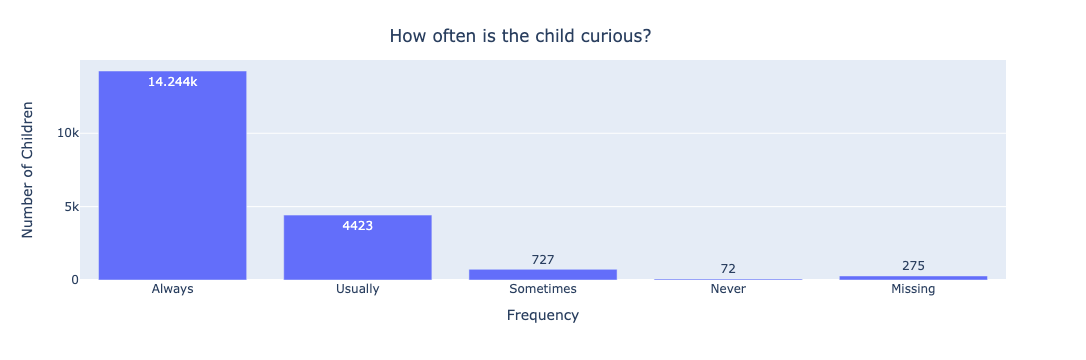

In [32]:
create_graphs(child_flourishing_df, 'curious_child')

#child_flourishing_df['K6Q70_R'].tolist()

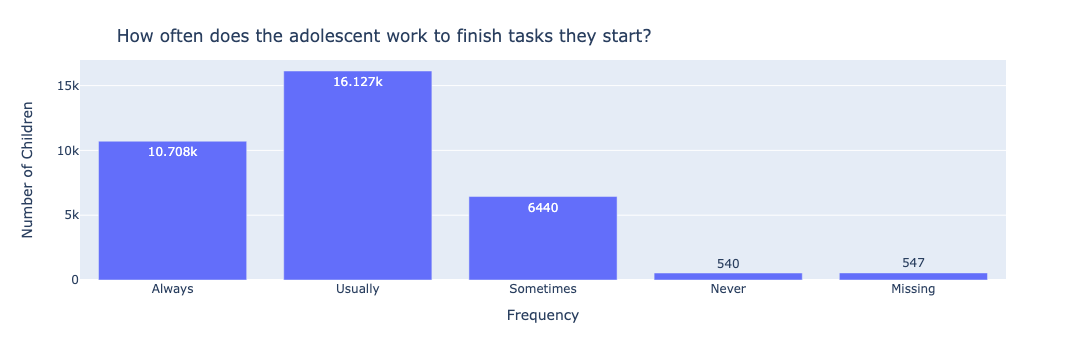

In [33]:
create_graphs(adolescent_flourishing_df, 'task_completion')

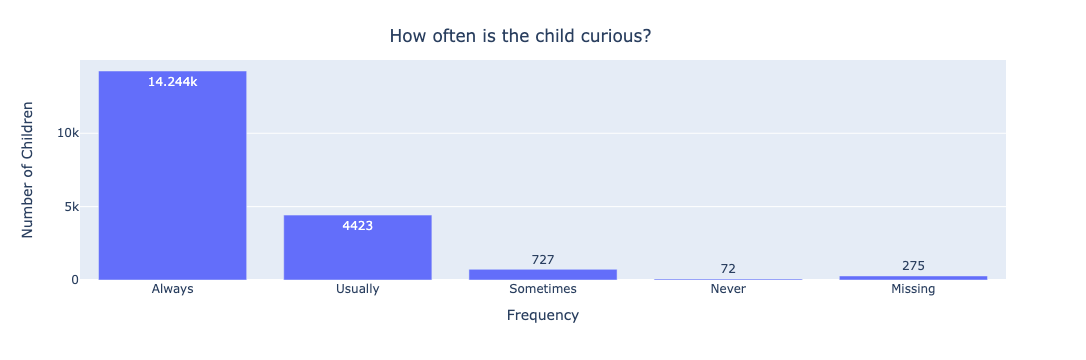

In [34]:
create_graphs(child_flourishing_df, 'curious_child')

In [35]:
child_flourishing_df.corr()

,child_age,affectionate_child,child_bounces_back,curious_child,child_smile_laugh
child_age,1.000000,0.037291,0.224249,0.120232,-0.011550
affectionate_child,0.037291,1.000000,0.362609,0.346744,0.420036
child_bounces_back,0.224249,0.362609,1.000000,0.370362,0.267727
curious_child,0.120232,0.346744,0.370362,1.000000,0.406824
child_smile_laugh,-0.011550,0.420036,0.267727,0.406824,1.000000


In [36]:
adolescent_flourishing_df.corr()

,adolescent_age,curiosity_learning,task_completion,emotional_regulation
adolescent_age,1.000000,0.237558,-0.013746,-0.112513
curiosity_learning,0.237558,1.000000,0.488438,0.386060
task_completion,-0.013746,0.488438,1.000000,0.560500
emotional_regulation,-0.112513,0.386060,0.560500,1.000000


In [37]:
#note- include errorhandling
#for functions- need to specify the type for the variable we are entering (ex- pandas data frame variable, string variable, etc.